<h1><center>Clustering & Classification Techniques</center></h1>

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Clustering with K-Means (Unsupervised Learning)
Choose relevant numerical features (after preprocessing and normalization) to cluster movies using K-Means. You may need to engineer or reduce features for better clustering.

## Steps to follow:
- Analyze clustering by group of "logical" features:

  - by financial metrics (e.g., gross, budget, runtime).  

  - by quality metrics (e.g., IMDB rating, Meta score).  

  - by popularity + genre (requires encoding categorical variables).  
  
  - or others based on previous analysis.
  
- Preprocess data: handle missing values, normalize features.  
  
- Use the Elbow Method and Silhouette Score to determine the optimal number of clusters (k).  
  
- Fit the K-Means algorithm and label each movie with its cluster.  
  
- Visualize the clusters in 2D using dimensionality reduction.  
  
- Interpret cluster profiles: what makes each group of movies unique?

## Import data

In [59]:
# Import normalized data

df = pd.read_csv("C:\\Users\\Elena\\OneDrive - Universitatea Babeş-Bolyai\\AI UBB - Semester 4\\Fundamentals of Machine Learning\\Assignments\\assignment1\\processed_data.csv")

print("Dataset Overview:")
df.describe()

Dataset Overview:


,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Drama,Crime,Action,...,Comedy,Thriller,Animation,Family,War,Mystery,Musical,Horror,Film-Noir,Sport
count,990.000000,990.000000,9.900000e+02,990.000000,990.000000,9.900000e+02,9.900000e+02,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.713212,3.852525,-2.009616e-16,0.204635,0.691260,3.875688e-16,1.004808e-16,0.722222,0.208081,0.189899,...,0.234343,0.138384,0.082828,0.056566,0.051515,0.100000,0.046465,0.032323,0.019192,0.019192
std,0.232535,2.016231,1.000505e+00,0.162237,0.162120,1.000505e+00,1.000505e+00,0.448130,0.406140,0.392419,...,0.423802,0.345477,0.275762,0.231128,0.221158,0.300152,0.210596,0.176947,0.137268,0.137268
min,0.000000,1.000000,-2.983369e+00,0.000000,0.000000,-1.582520e+00,-4.107568e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.560000,2.000000,-7.587360e-01,0.058824,0.597222,-8.786551e-01,-5.822599e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.790000,5.000000,-1.078610e-01,0.176471,0.694444,-6.103701e-02,2.783395e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.890000,6.000000,5.527286e-01,0.294118,0.805556,8.293642e-01,7.504032e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,3.311662e+00,1.000000,1.000000,2.456971e+00,1.740106e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data preprocessing

In [60]:
# Normalize Certificate column
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df['Certificate'] = min_max_scaler.fit_transform(df[['Certificate']])
df['Certificate'].head()

0    0.0
1    0.0
2    0.8
3    0.0
4    1.0
Name: Certificate, dtype: float64

In [61]:
# Standardize IMDB_Rating column
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df['IMDB_Rating'] = standard_scaler.fit_transform(df[['IMDB_Rating']])
df['IMDB_Rating'].head()

0    4.904967
1    4.542206
2    3.816685
3    3.816685
4    3.816685
Name: IMDB_Rating, dtype: float64

In [83]:
df.describe()

,Released_Year,Certificate,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Drama,Crime,Action,...,Thriller,Animation,Family,War,Mystery,Musical,Horror,Film-Noir,Sport,Kmeans_cluster
count,990.000000,990.000000,9.900000e+02,9.900000e+02,990.000000,9.900000e+02,9.900000e+02,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.713212,0.570505,-2.009616e-16,-1.148352e-16,0.691260,3.875688e-16,1.004808e-16,0.722222,0.208081,0.189899,...,0.138384,0.082828,0.056566,0.051515,0.100000,0.046465,0.032323,0.019192,0.019192,1.592929
std,0.232535,0.403246,1.000505e+00,1.000505e+00,0.162120,1.000505e+00,1.000505e+00,0.448130,0.406140,0.392419,...,0.345477,0.275762,0.231128,0.221158,0.300152,0.210596,0.176947,0.137268,0.137268,1.026913
min,0.000000,0.000000,-2.983369e+00,-1.261968e+00,0.000000,-1.582520e+00,-4.107568e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.560000,0.200000,-7.587360e-01,-8.992074e-01,0.597222,-8.786551e-01,-5.822599e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.790000,0.800000,-1.078610e-01,-1.736855e-01,0.694444,-6.103701e-02,2.783395e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.890000,1.000000,5.527286e-01,5.518363e-01,0.805556,8.293642e-01,7.504032e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,3.311662e+00,4.904967e+00,1.000000,2.456971e+00,1.740106e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


## Feature selection
We cluster our data based on the following criteria:
- Quality and popularity metrics: *'Gross', 'No_of_Votes', 'IMDB_Rating'*  
  
This measures the overall success of a movie and we expect to see movies with similar levels of quality and popularity in the same cluster.

In [63]:
# Select features used for K-clustering
features_columns = ['No_of_Votes', 'Gross', 'IMDB_Rating']

df_features = df[features_columns]
df_features

,No_of_Votes,Gross,IMDB_Rating
0,2.456971,0.223012,4.904967
1,2.128575,0.899894,4.542206
2,2.441687,1.497093,3.816685
3,1.807612,0.528329,3.816685
4,1.368242,-0.588818,3.816685
...,...,...,...
985,0.102828,0.185829,-1.261968
986,-1.309917,0.914011,-1.261968
987,-1.095077,0.254846,-1.261968
988,-1.534743,-0.218828,-1.261968


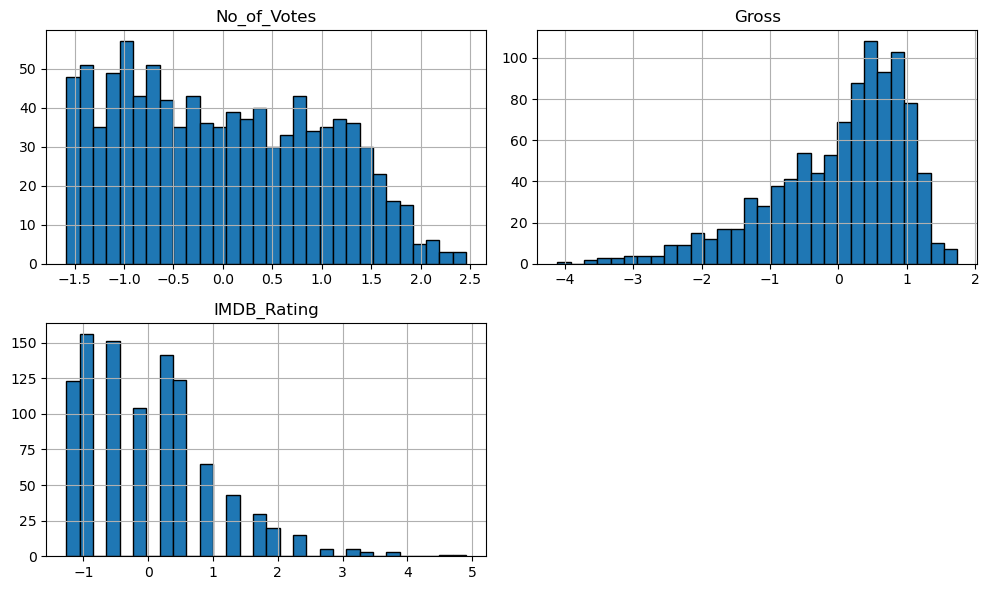

In [64]:
df[features_columns].hist(figsize=(10, 6), bins=30, edgecolor='black')

plt.tight_layout()
plt.show()

## Determine the optimal number of clusters
We use the Elbow Inertias and the Silhouette Scores to determine the optimal $k$.

**Elbow method**:  
- Measures inertia: the sum of squared distances between each point and its cluster's centroid.  
- As $k$ increases, inertia decreases — but after a point, the improvement drops off (like an elbow in a curve). -> Choose $k$ at the elbow point.  
  
**Silhouette score**:
- Measure how well each point fits into its cluster.
- Formula:
  $$ s = \frac{b-a}{max(a,b)} $$
  $$ a = \text{average distance to points in the same cluster} $$
  $$ b = \text{average distance to points in the nearest other cluster} $$
- Score range: $1$ to $−1$. Higher is better. -> Choose $k$ that maximizes silhouette score.

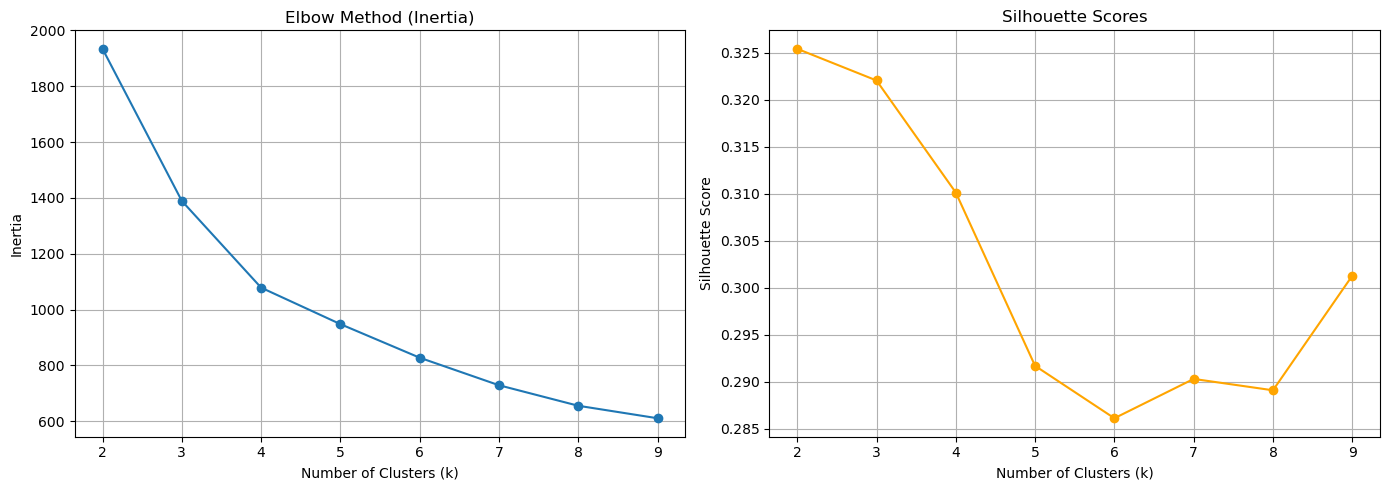

In [75]:
# Plotting the Elbow Inertia and the Silhouette Scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of clusters to try
k_range = range(2, 10)

# Store metrics
inertias = []
silhouette_scores = []

# Loop through k values
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=15)
  labels = kmeans.fit_predict(df_features)

  inertias.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(df_features, labels))

# Plot both metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow (Inertia)
ax[0].plot(k_range, inertias, marker='o')
ax[0].set_title('Elbow Method (Inertia)')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia')
ax[0].grid()

# Silhouette Score
ax[1].plot(k_range, silhouette_scores, marker='o', color='orange')
ax[1].set_title('Silhouette Scores')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].grid()

plt.tight_layout()
plt.show()

By analysing the two graphs, we can choose $k = 4$ to optimize the K-Clustering algorithm.

## Cluster and label data

In [76]:
# Group data into 4 clusters, include the label in the dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_features)

clusters = kmeans.labels_
df['Kmeans_cluster'] = clusters

df[['Series_Title', 'Kmeans_cluster']].head(10)

,Series_Title,Kmeans_cluster
0,The Shawshank Redemption,0
1,The Godfather,0
2,The Dark Knight,0
3,The Godfather: Part II,0
4,12 Angry Men,0
5,The Lord of the Rings: The Return of the King,0
6,Pulp Fiction,0
7,Schindler's List,0
8,Inception,0
9,Fight Club,0


## Visualize the clusters in 2D space
This is achieved through dimensionality reduction methods. Particularly, we will apply Principal Component Analysis to reduce the data to 2 categories and try to find meaningful insights.

In [77]:
# Apply PCA to reduce features to 2
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_features)

pc_importance = pd.DataFrame(
  np.abs(pca.components_),
  columns = df_features.select_dtypes(include=['number']).columns
)

print("Principal components and features based on importance:")
top_features_per_pc = pc_importance.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)
for idx, features in top_features_per_pc.items():
  print(f"PC{idx+1}: {', '.join(features)}")
    
df_pca = pd.DataFrame(pca_transformed, columns = ["PC1", "PC2"])

Principal components and features based on importance:
PC1: No_of_Votes, Gross, IMDB_Rating
PC2: IMDB_Rating, Gross, No_of_Votes


- The first principal feature is influenced more significantly by the No_of_Votes (which indicates higher popularity).
- The second principal feature is influenced more by the IMDB_Rating (which indicates higher movie quality).

In [95]:
# Plot the clusters in the 2D space
df_pca['Kmeans_cluster'] = df['Kmeans_cluster']
df_pca['Series_Title'] = df['Series_Title']

fig = px.scatter(
  df_pca, 
  x='PC1', 
  y='PC2', 
  color='Kmeans_cluster',
  hover_data={'PC1': True, 'PC2': True, 'Series_Title': True},
  labels={'Kmeans_cluster': 'Cluster', 'PC1': 'PC1 (popularity)', 'PC2': 'PC2 (quality)'},
  title='K-Means Clusters in 2D PCA Space'
)
fig.show()


By visualizing the data we find the following insights:
- the 4 clusters seem to be strongly linked to popularity and quality, roughly labeling the movies as Low-popularity / High-popularity and Lower-quality / Higher-quality.  
  
- The 4 regions have decently well determined boundaries.  
  
- The "lower quality" groupings tend to be clustered closer together, while the "higher quality" groupings are more sparce. This is explained by the skewed nature of the 'IMDB_Rating' feature.  
  
Some interesting representatives of the 4 clusters:
- **Cluster 0** (high popularity, high quality):
  - The Godfather
  - The Dark Knight
  - Avengers: Endgame  
- **Cluster 1** (high popularity, lower quality):
  - The Lego Movie
  - Watchmen
  - The Nightmare Before Christmas  
- **Cluster 2** (lower popularity, lower quality):
  - The Muppet Movie
  - The Circus (Charlie Chaplin)
  - Nosferatu  
- **Cluster 3** (lower popularity, high quality):
  - Tengoku to jigoku (High and Low)
  - Tonari no Totoro (My neighbour Totoro)
  - Modern Times (Charlie Chaplin)  
  
Besides the quality - popularity divide, I have also observed the following correlations:
- Most animations and kids movies are found in cluster 1.
- Most crime and superhero movies are found in cluster 0.
- Most Japanese and French films are found in cluster 3.
  
This means that there might be other hidden connections between the data to be explored.

# Classification with Logistic Regression (Supervised Learning)
Build a Logistic Regression classifier to predict a binary class (e.g., "Is_Highly_Rated") based on movie features.

## Steps to follow:
- Create a binary target variable: for example, Is_Highly_Rated = 1 if IMDB rating >= 8.0, otherwise 0 (but you can select others that you identified relevant inprevious experiments).
- Choose appropriate input features (including feature engineering).
- Split dataset into training and test sets.
- Train a Logistic Regression model.
- Evaluate using accuracy, confusion matrix, precision, recall, and f1-score.
- Interpret the coefficients of the model: what influences movie quality most?

## Create binary target variable and choose features
The target variable we will consider is 'Is_Flop', which measures if a movie achieved below average Gross values.

In [123]:
# Define target variable
df['Is_Flop'] = (df['Gross'] < 0).astype(int)

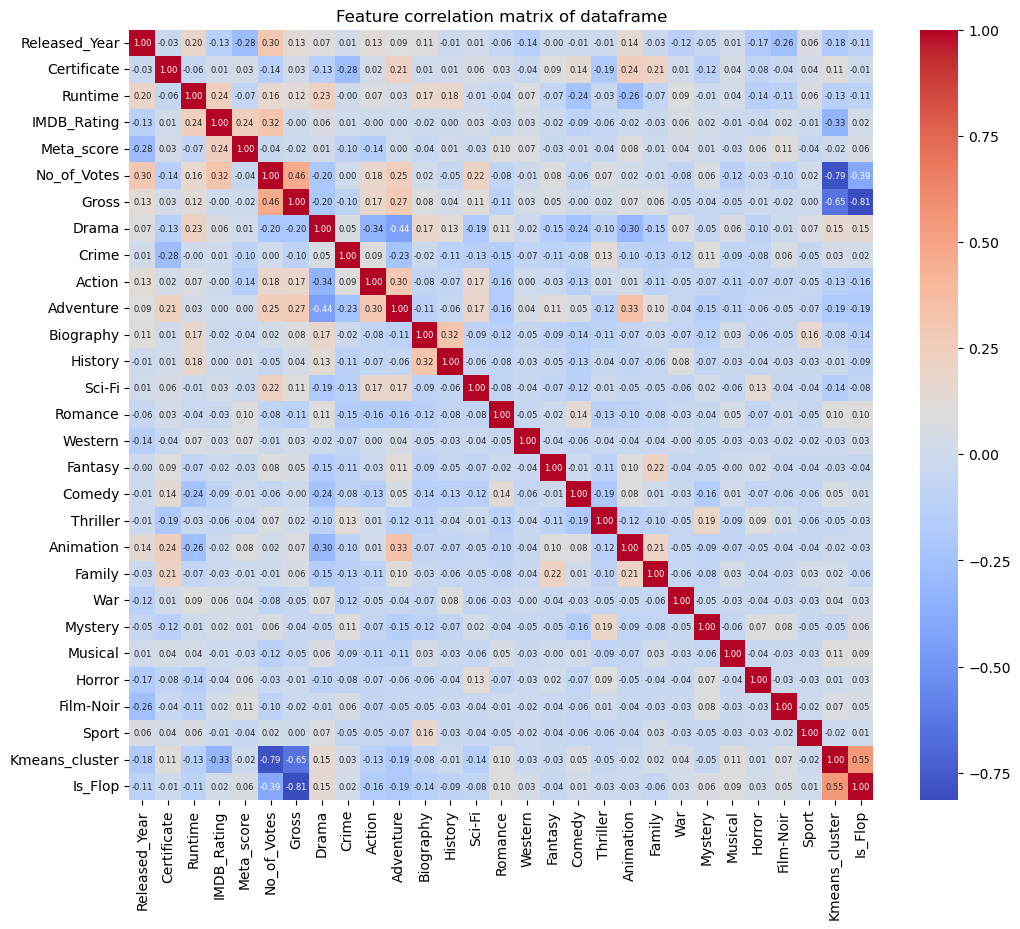

In [130]:
# Heatmap of features
plt.figure(figsize=(12, 10))
sns.heatmap(
  df.select_dtypes(include=[np.number]).corr(),
  cmap="coolwarm",
  annot=True, annot_kws={"size": 6},fmt=".2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Feature correlation matrix of dataframe")
plt.show()

By analyzing the heatmap, we get an idea of how certaing features are related to our new category.  
  
To predict this variable let us consider the following features:
- *Gross*: as expected, this should impact our variable greatly;
- *No_of_Votes*: popularity should also have a significant impact;
- *Released_Year*: possibility that older movies generate less revenue;
- *Drama*, *Action*, *Adventure*: these genres seem to impact the success most out of the ones considered;
- *Meta_score*: lower rated movies could be less interesting to viewers.


In [133]:
# Choose features for Regression training
features = df[['Gross', 'No_of_Votes', 'Released_Year', 'Drama', 'Action', 'Adventure', 'Meta_score']].values
target = df[['Is_Flop']].values.flatten()


## Split dataset

In [136]:
# Split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


## Train Logistic Regression

In [143]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression(max_iter=1000, solver='liblinear')
log_regression.fit(X_train, y_train)

y_predicted = log_regression.predict(X_test)

## Evaluate model
We use multiple metrics to evaluate the performance of our model.

Metrics considered:  
- **Confusion Matrix**: A 2x2 matrix which shows:  
  - TP (True Positives)
  - FP (False Positives)
  - FN (False Negatives)
  - TN (True Negatives).
- **Accuracy** : The proportion of total predictions that are correct.
  $$ \text{Accuracy} = \frac{TP+TN}{TP+TN+FP+FN} $$
- **Precision**: Of all the examples the model predicted as positive, how many were actually TP.
  $$ \text{Precision} = \frac{TP}{TP+FP} $$
- **Recall**: Of all the actual positives, how many the model correctly identified.
  $$ \text{Recall} = \frac{TP}{TP+FN} $$
- **F1 Score**: The harmonic mean of precision and recall — balances the two.
  $$ \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [146]:
# Evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", round(accuracy, 4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_predicted, zero_division=0)
recall = recall_score(y_test, y_predicted, zero_division=0)
f1 = f1_score(y_test, y_predicted, zero_division=0)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))

Accuracy: 0.9798
Confusion Matrix:
[[120   0]
 [  4  74]]
Precision: 1.0
Recall: 0.9487
F1 Score: 0.9737


**Performance:**  
We see a very good performance of the model, with no False Positive values and only 4 False Negative values.

## Feature importance
We analyze how each variable contributed to the Logistics Regression model, by simply comparing the coefficients for each variable.

In [148]:
# Determine feature importance for trained model
feature_names = ['Gross', 'No_of_Votes', 'Released_Year', 'Drama', 'Action', 'Adventure', 'Meta_score']

coefficients = log_regression.coef_[0]
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficient to see which features have the strongest influence
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df[['Feature', 'Coefficient']])

         Feature  Coefficient
0          Gross    -7.545052
2  Released_Year    -0.329342
5      Adventure     0.229808
4         Action    -0.194322
1    No_of_Votes    -0.159535
6     Meta_score    -0.069647
3          Drama    -0.063841


**Findings**:  
- As expected, the most relevant feature for the model is the Gross, which we used to define our binary target variable.
- The rest of the features have much lower impact on the model in comparison, but are nonetheless useful.
- Out of the non-trivial feature, the biggest impact seems to be that of the 'Released_Year' variable, confirming that newer movies are less likely to be flops.

# Clustering with DBSCAN (Unsupervised Learning)

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) finds core samples in regions of high density and expands clusters from them. This algorithm is good for data which contains clusters of similar density.  
Parameters:
- eps: The maximum distance between two points for them to be considered neighbors.
- min_samples: The minimum number of points required to form a dense region (a cluster core).

In [222]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select features used for GMM-clustering
features_columns = ['No_of_Votes', 'Gross', 'IMDB_Rating']
df_features = df[features_columns]

dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(df_features)

# Add DBSCAN labels to dataframe
df['DBSCAN_cluster'] = dbscan_labels

# Check number of clusters (excluding -1, which is noise)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters found by DBSCAN:", n_clusters)

Number of clusters found by DBSCAN: 15


In [223]:
# Plot the clusters in the 2D space
df_pca['DBSCAN_cluster'] = dbscan_labels

fig = px.scatter(
  df_pca, 
  x='PC1', 
  y='PC2', 
  color='DBSCAN_cluster',
  hover_data={'PC1': True, 'PC2': True, 'Series_Title': True},
  labels={'DBSCAN_cluster': 'Cluster', 'PC1': 'PC1 (popularity)', 'PC2': 'PC2 (quality)'},
  title='DBSCAN Clusters in 2D PCA Space'
)
fig.show()

**Findings**:
- This clustering algorithm helped identify some clusters in the data, but most of the entries ended up being classified as noise.
- This is due to the fact that the DBSCAN clustering algorithm searches for high density areas, which might not fit the data we are working with on a larger scale.

# Classification with Support Vector Machines (Supervised Learning)

A **Support Vector Machine** (SVM) is a supervised machine learning algorithm that classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space.
Parameters:  
- gamma: Controls how far the influence of a single training example reaches.

In [229]:
# Train SVM model
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=15)
svm_classifier.fit(X_train, y_train)

y_predicted = svm_classifier.predict(X_test)

In [230]:
# Evaluate model
# Accuracy
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", round(accuracy, 4))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1 Score
precision = precision_score(y_test, y_predicted, zero_division=0)
recall = recall_score(y_test, y_predicted, zero_division=0)
f1 = f1_score(y_test, y_predicted, zero_division=0)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))

Accuracy: 0.9747
Confusion Matrix:
[[119   1]
 [  4  74]]
Precision: 0.9867
Recall: 0.9487
F1 Score: 0.9673


**Performance:**  
We see a very good performance of the model, with only 1 False Positive value and 4 False Negative values.

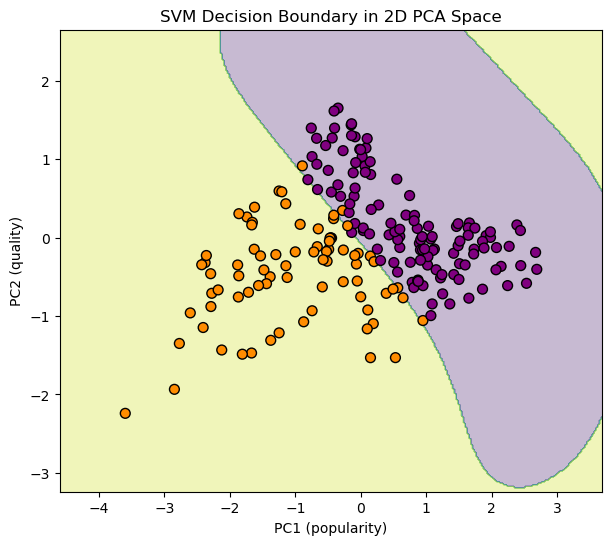

In [238]:
# Plot decision boundary in PCA 2D space
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM on the 2D training data:
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=15)
svm_classifier.fit(X_train_pca, y_train)

x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predict labels for each point in the grid:
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = svm_classifier.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary:
plt.figure(figsize=(7, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)

# Plot the decision boundary:
colors = ['darkorange' if label == 1 else 'purple' for label in y_test]
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=colors, edgecolor='k', s=50)
plt.xlabel("PC1 (popularity)")
plt.ylabel("PC2 (quality)")
plt.title("SVM Decision Boundary in 2D PCA Space")
plt.show()